<a href="https://colab.research.google.com/github/oslemokita/fraud-detection-project/blob/main/Fraud_Detection_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Stil ayarları
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

print("Kütüphaneler başarıyla yüklendi.")

Kütüphaneler başarıyla yüklendi.


In [4]:
# Veri setini yükleme
df = pd.read_csv('creditcard.csv')

# Veri setinin ilk 5 satırını gösterme
print("Veri Setinin İlk 5 Satırı:")
display(df.head())

# Veri seti hakkında genel bilgi
print("\nVeri Seti Bilgileri:")
df.info()

Veri Setinin İlk 5 Satırı:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

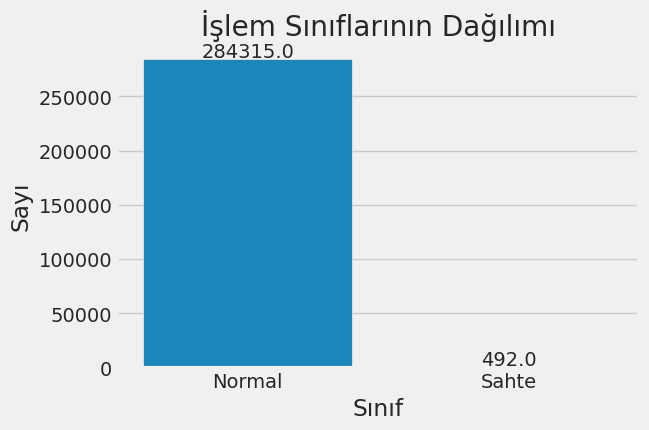

In [6]:
# 'Class' sütununun dağılımını gösteren countplot çizdirme
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=df)
plt.title('İşlem Sınıflarının Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Sayı')
plt.xticks([0, 1], ['Normal', 'Sahte'])

# Her bir çubuğun üzerine sayıları ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [7]:
# 'Amount' ve 'Time' sütunlarını ölçeklendirme
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Orijinal 'Time' ve 'Amount' sütunlarını kaldırma
df.drop(['Time', 'Amount'], axis=1, inplace=True)

print("Veri ölçeklendirme tamamlandı.")
display(df.head())

Veri ölçeklendirme tamamlandı.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [8]:
# Özellikler (X) ve hedef değişken (y) olarak ayırma
X = df.drop('Class', axis=1)
y = df['Class']

# Eğitim ve test setlerine ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (199364, 30)
Test seti boyutu: (85443, 30)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Sonuçları saklamak için bir dataframe
results_df = pd.DataFrame(columns=['Model', 'SMOTE', 'Accuracy', 'Precision (Fraud)', 'Recall (Fraud)', 'F1-Score (Fraud)', 'AUC'])

def evaluate_model(model, X_test, y_test, model_name, smote_status):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    auc = roc_auc_score(y_test, y_prob)

    print(f"--- {model_name} ({smote_status}) Sonuçları ---")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Sahte']))

    # Karmaşıklık matrisini çizdir
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Sahte'], yticklabels=['Normal', 'Sahte'])
    plt.title(f'{model_name} ({smote_status}) Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değer')
    plt.xlabel('Tahmin Edilen Değer')
    plt.show()

    return {'Model': model_name, 'SMOTE': smote_status, 'Accuracy': accuracy, 'Precision (Fraud)': precision, 'Recall (Fraud)': recall, 'F1-Score (Fraud)': f1_score, 'AUC': auc}

--- Logistic Regression (Yok) Sonuçları ---
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Sahte       0.86      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



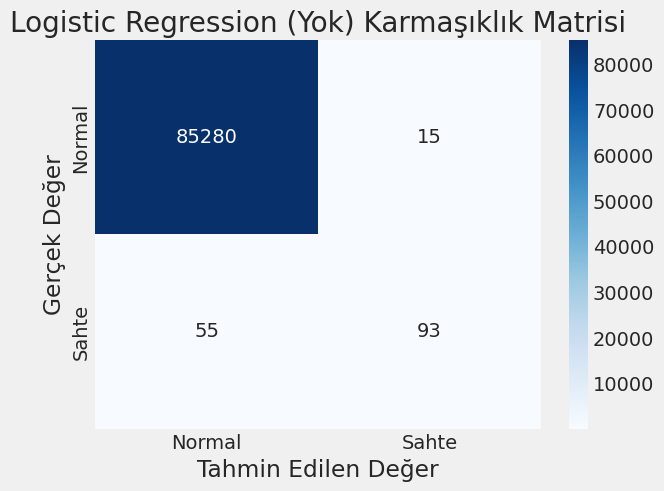

/tmp/ipython-input-11-951316306.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([res_lr_b])], ignore_index=True)


--- Random Forest (Yok) Sonuçları ---
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Sahte       0.95      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



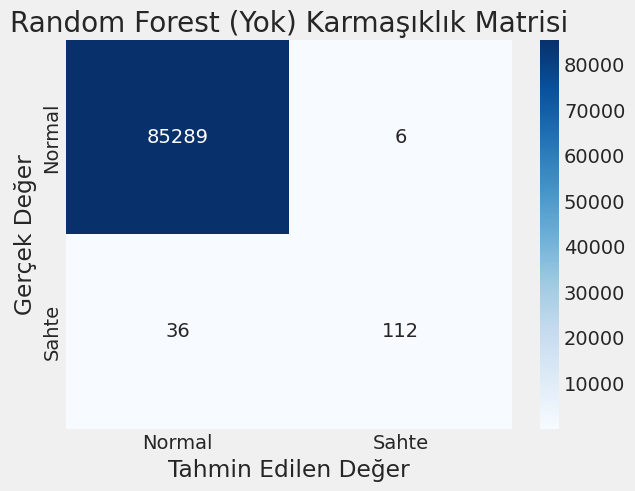

In [11]:
# --- LOGISTIC REGRESSION (BASELINE) ---
lr_baseline = LogisticRegression(solver='liblinear').fit(X_train, y_train)
res_lr_b = evaluate_model(lr_baseline, X_test, y_test, 'Logistic Regression', 'Yok')
results_df = pd.concat([results_df, pd.DataFrame([res_lr_b])], ignore_index=True)

# --- RANDOM FOREST (BASELINE) ---
rf_baseline = RandomForestClassifier(random_state=42).fit(X_train, y_train)
res_rf_b = evaluate_model(rf_baseline, X_test, y_test, 'Random Forest', 'Yok')
results_df = pd.concat([results_df, pd.DataFrame([res_rf_b])], ignore_index=True)

In [12]:
!pip install imbalanced-learn

In [13]:
from imblearn.over_sampling import SMOTE

# SMOTE uygulamasını başlatma
smote = SMOTE(random_state=42)

# SMOTE'u eğitim verilerine uygulama
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE uygulandı.")
print("SMOTE uygulanmış eğitim seti boyutu:", X_train_smote.shape)

SMOTE uygulandı.
SMOTE uygulanmış eğitim seti boyutu: (398040, 30)


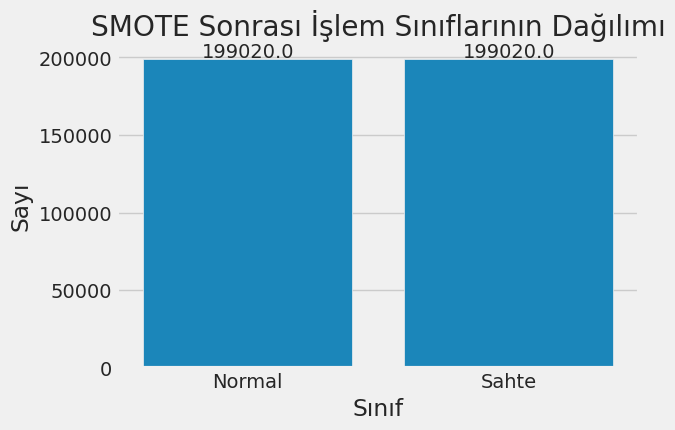

In [14]:
# SMOTE sonrası 'Class' sütununun dağılımını gösteren countplot çizdirme
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_train_smote)
plt.title('SMOTE Sonrası İşlem Sınıflarının Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Sayı')
plt.xticks([0, 1], ['Normal', 'Sahte'])

# Her bir çubuğun üzerine sayıları ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

--- Logistic Regression (Var) Sonuçları ---
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     85295
       Sahte       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



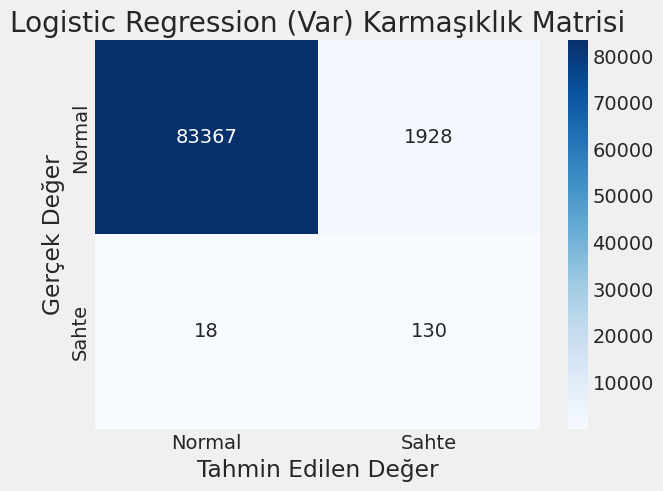

--- Random Forest (Var) Sonuçları ---
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Sahte       0.86      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



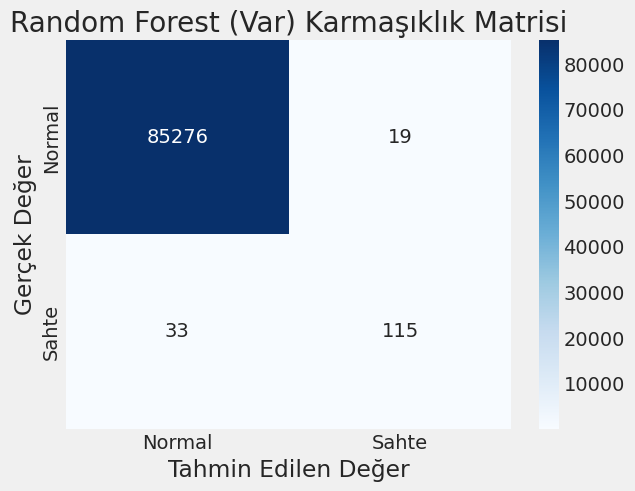

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:19:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost (Yok) Sonuçları ---
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Sahte       0.94      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



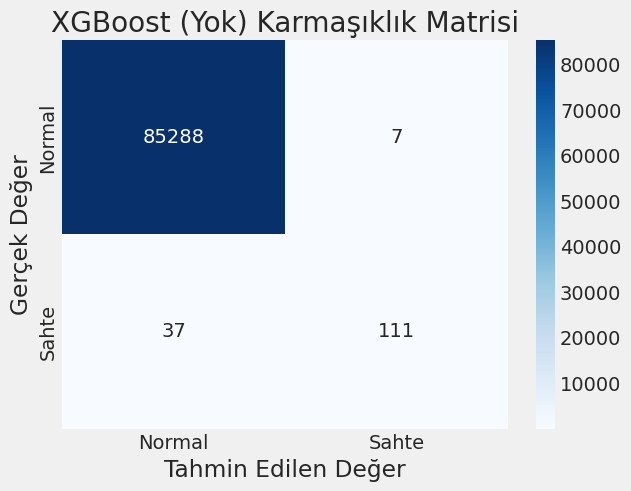

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:19:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost (Var) Sonuçları ---
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Sahte       0.76      0.80      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



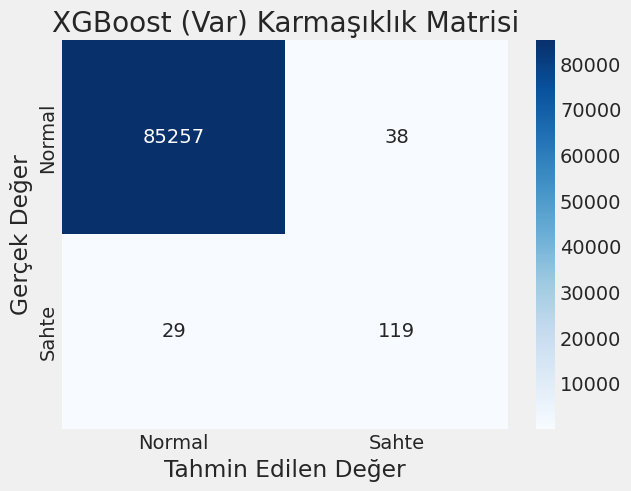

In [15]:
# --- LOGISTIC REGRESSION (SMOTE) ---
lr_smote = LogisticRegression(solver='liblinear').fit(X_train_smote, y_train_smote)
# DİKKAT: Model SMOTE'lu veri ile eğitildi, ama her zaman ORİJİNAL test seti ile değerlendirilir!
res_lr_s = evaluate_model(lr_smote, X_test, y_test, 'Logistic Regression', 'Var')
results_df = pd.concat([results_df, pd.DataFrame([res_lr_s])], ignore_index=True)

# --- RANDOM FOREST (SMOTE) ---
rf_smote = RandomForestClassifier(random_state=42).fit(X_train_smote, y_train_smote)
res_rf_s = evaluate_model(rf_smote, X_test, y_test, 'Random Forest', 'Var')
results_df = pd.concat([results_df, pd.DataFrame([res_rf_s])], ignore_index=True)

# --- XGBOOST (HEM BASELINE HEM SMOTE) ---
# XGBoost'u dün eklemediğimiz için her iki senaryoyu da şimdi yapalım.

# Baseline (SMOTE'suz)
xgb_baseline = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)
res_xgb_b = evaluate_model(xgb_baseline, X_test, y_test, 'XGBoost', 'Yok')
results_df = pd.concat([results_df, pd.DataFrame([res_xgb_b])], ignore_index=True)

# SMOTE'lu
xgb_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss').fit(X_train_smote, y_train_smote)
res_xgb_s = evaluate_model(xgb_smote, X_test, y_test, 'XGBoost', 'Var')
results_df = pd.concat([results_df, pd.DataFrame([res_xgb_s])], ignore_index=True)

In [17]:
print("--- Tüm Modellerin Karşılaştırmalı Sonuçları ---")
# Recall (Fraud) sütununa göre sıralama
results_df_sorted = results_df.sort_values(by='Recall (Fraud)', ascending=False)
display(results_df_sorted)

# Bu tabloyu rapora eklemek için CSV olarak kaydet
results_df_sorted.to_csv('model_karsilastirma_sonuclari.csv', index=False)

--- Tüm Modellerin Karşılaştırmalı Sonuçları ---


,Model,SMOTE,Accuracy,Precision (Fraud),Recall (Fraud),F1-Score (Fraud),AUC
2,Logistic Regression,Var,0.977225,0.063168,0.878378,0.117860,0.965946
5,XGBoost,Var,0.999216,0.757962,0.804054,0.780328,0.970824
3,Random Forest,Var,0.999391,0.858209,0.777027,0.815603,0.948886
1,Random Forest,Yok,0.999508,0.949153,0.756757,0.842105,0.937393
4,XGBoost,Yok,0.999485,0.940678,0.750000,0.834586,0.973339
0,Logistic Regression,Yok,0.999181,0.861111,0.628378,0.726562,0.954448


from matplotlib import pyplot as plt
results_df_sorted['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted['Precision (Fraud)'].plot(kind='hist', bins=20, title='Precision (Fraud)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted['Recall (Fraud)'].plot(kind='hist', bins=20, title='Recall (Fraud)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted['F1-Score (Fraud)'].plot(kind='hist', bins=20, title='F1-Score (Fraud)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df_sorted.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df_sorted.groupby('SMOTE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted.plot(kind='scatter', x='Accuracy', y='Precision (Fraud)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted.plot(kind='scatter', x='Precision (Fraud)', y='Recall (Fraud)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted.plot(kind='scatter', x='Recall (Fraud)', y='F1-Score (Fraud)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted.plot(kind='scatter', x='F1-Score (Fraud)', y='AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted['Precision (Fraud)'].plot(kind='line', figsize=(8, 4), title='Precision (Fraud)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted['Recall (Fraud)'].plot(kind='line', figsize=(8, 4), title='Recall (Fraud)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df_sorted['F1-Score (Fraud)'].plot(kind='line', figsize=(8, 4), title='F1-Score (Fraud)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['SMOTE'].value_counts()
    for x_label, grp in results_df_sorted.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('SMOTE')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df_sorted['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df_sorted, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df_sorted['SMOTE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df_sorted, x='Accuracy', y='SMOTE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df_sorted['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df_sorted, x='Precision (Fraud)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df_sorted['SMOTE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df_sorted, x='Precision (Fraud)', y='SMOTE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

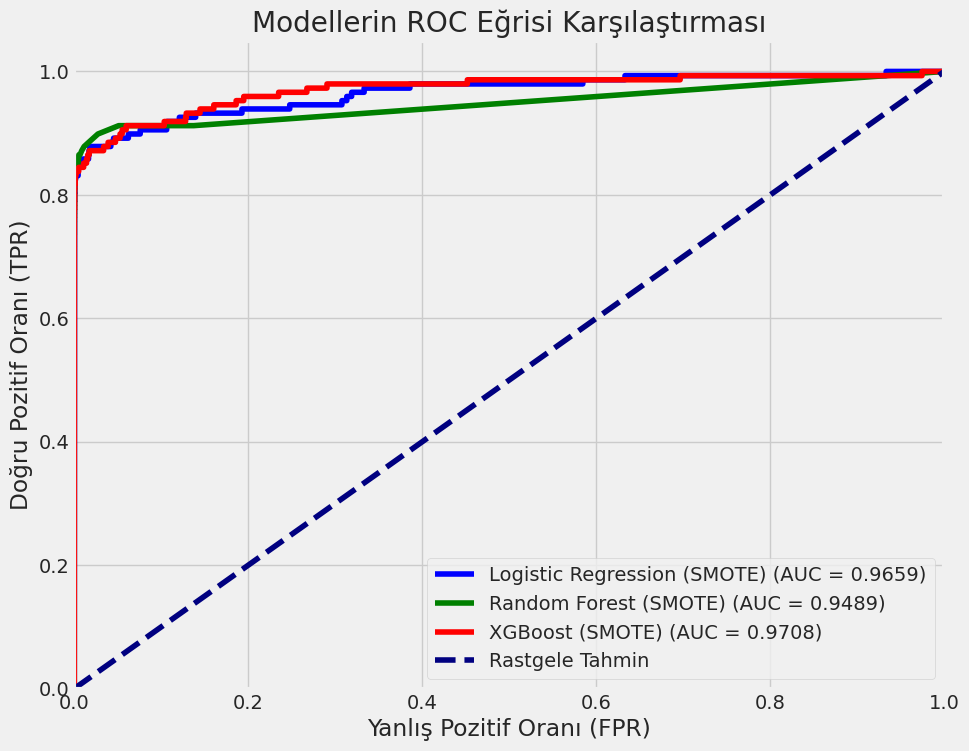

In [18]:
# En iyi modellerin (SMOTE'lu versiyonlar) ROC eğrilerini çizdirme
plt.figure(figsize=(10, 8))

# Modelleri ve renkleri tanımla
models_to_plot = {
    'Logistic Regression (SMOTE)': lr_smote,
    'Random Forest (SMOTE)': rf_smote,
    'XGBoost (SMOTE)': xgb_smote
}
colors = ['blue', 'green', 'red']

for (name, model), color in zip(models_to_plot.items(), colors):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Rastgele Tahmin')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('Modellerin ROC Eğrisi Karşılaştırması')
plt.legend(loc="lower right")
plt.savefig('roc_karsilastirma.png', bbox_inches='tight') # Grafiği rapora eklemek için kaydet
plt.show()